# 302 Classification


In [8]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)    # reproducible

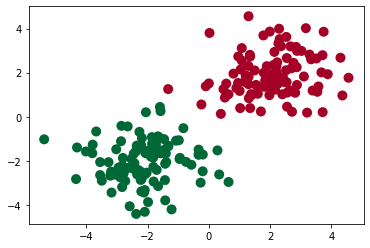

In [9]:
# make fake data
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [10]:
x

tensor([[ 4.7440e-01,  1.2498e+00],
        [ 1.3460e+00,  3.9052e-01],
        [ 1.8998e+00,  1.3908e+00],
        [ 1.0202e+00,  3.9090e-01],
        [ 1.2879e+00,  2.3037e+00],
        [ 1.2227e+00,  1.7485e+00],
        [ 1.7777e+00,  3.6871e+00],
        [ 2.2284e+00,  2.4676e+00],
        [ 1.3030e+00,  8.3924e-01],
        [ 2.6995e+00,  2.1991e+00],
        [ 2.8657e+00,  2.2444e+00],
        [ 1.3371e+00,  2.8073e+00],
        [ 3.1017e+00,  1.8241e+00],
        [-2.4556e-01,  5.5354e-01],
        [ 2.0612e+00,  1.3823e+00],
        [ 1.2019e+00,  1.8684e+00],
        [ 3.8793e+00,  1.9279e+00],
        [ 2.1578e+00,  1.2265e+00],
        [ 2.1991e+00,  2.0457e+00],
        [ 2.1530e+00,  1.5243e+00],
        [ 1.8890e+00,  2.2927e+00],
        [ 1.8422e+00,  1.9712e+00],
        [ 4.3571e+00,  9.6266e-01],
        [ 3.5748e+00,  1.3702e+00],
        [ 1.0726e+00,  2.5451e+00],
        [ 2.0663e+00,  1.5630e+00],
        [ 2.7626e+00,  2.4415e+00],
        [ 3.1651e+00,  4.015

In [11]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        return x

In [12]:
net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [13]:
plt.ion()   # something about plotting

tensor([[ 3.7821e-01,  1.0146e+00],
        [ 3.8805e-01,  1.0839e+00],
        [ 4.8340e-01,  1.3819e+00],
        [ 3.6349e-01,  9.9664e-01],
        [ 3.9465e-01,  1.2598e+00],
        [ 4.5155e-01,  1.2723e+00],
        [ 2.7564e-01,  1.3103e+00],
        [ 5.4411e-01,  1.6154e+00],
        [ 4.2995e-01,  1.1685e+00],
        [ 5.5950e-01,  1.6807e+00],
        [ 5.6735e-01,  1.7203e+00],
        [ 3.2231e-01,  1.2206e+00],
        [ 5.4703e-01,  1.6880e+00],
        [ 2.6271e-01,  7.0595e-01],
        [ 4.8761e-01,  1.4108e+00],
        [ 4.3780e-01,  1.2622e+00],
        [ 5.7674e-01,  1.8538e+00],
        [ 4.8035e-01,  1.4006e+00],
        [ 5.3476e-01,  1.5581e+00],
        [ 4.9954e-01,  1.4541e+00],
        [ 5.0691e-01,  1.4980e+00],
        [ 5.1938e-01,  1.4771e+00],
        [ 5.7454e-01,  1.8990e+00],
        [ 5.3698e-01,  1.7098e+00],
        [ 3.0628e-01,  1.1345e+00],
        [ 4.9949e-01,  1.4448e+00],
        [ 5.7711e-01,  1.7369e+00],
        [ 5.3313e-01,  1.889

D:\programs\envs\python36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


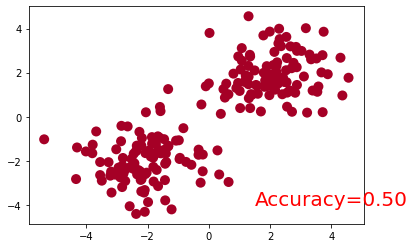

tensor([[ 4.2838e-01,  9.5803e-01],
        [ 4.3721e-01,  1.0281e+00],
        [ 5.5463e-01,  1.2999e+00],
        [ 4.0890e-01,  9.4620e-01],
        [ 4.7147e-01,  1.1698e+00],
        [ 5.1889e-01,  1.1941e+00],
        [ 3.8062e-01,  1.1859e+00],
        [ 6.3554e-01,  1.5075e+00],
        [ 4.8481e-01,  1.1061e+00],
        [ 6.5373e-01,  1.5709e+00],
        [ 6.6449e-01,  1.6070e+00],
        [ 4.0777e-01,  1.1202e+00],
        [ 6.4095e-01,  1.5784e+00],
        [ 2.9428e-01,  6.7235e-01],
        [ 5.6087e-01,  1.3263e+00],
        [ 5.0677e-01,  1.1820e+00],
        [ 6.8266e-01,  1.7295e+00],
        [ 5.5255e-01,  1.3173e+00],
        [ 6.1995e-01,  1.4593e+00],
        [ 5.7620e-01,  1.3655e+00],
        [ 5.9128e-01,  1.3989e+00],
        [ 5.9865e-01,  1.3855e+00],
        [ 6.7082e-01,  1.7832e+00],
        [ 6.2969e-01,  1.5990e+00],
        [ 3.8427e-01,  1.0432e+00],
        [ 5.7557e-01,  1.3569e+00],
        [ 6.7586e-01,  1.6217e+00],
        [ 6.6063e-01,  1.736

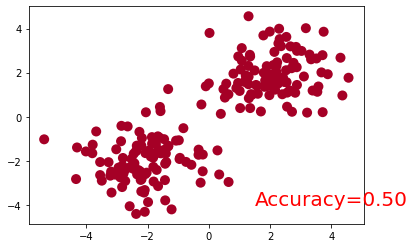

tensor([[ 0.5609,  0.8130],
        [ 0.5670,  0.8852],
        [ 0.7429,  1.0902],
        [ 0.5287,  0.8171],
        [ 0.6745,  0.9394],
        [ 0.6968,  0.9940],
        [ 0.6584,  0.8678],
        [ 0.8774,  1.2318],
        [ 0.6296,  0.9467],
        [ 0.9030,  1.2908],
        [ 0.9215,  1.3179],
        [ 0.6338,  0.8630],
        [ 0.8894,  1.2989],
        [ 0.3773,  0.5855],
        [ 0.7545,  1.1103],
        [ 0.6890,  0.9769],
        [ 0.9630,  1.4129],
        [ 0.7433,  1.1044],
        [ 0.8453,  1.2071],
        [ 0.7788,  1.1392],
        [ 0.8144,  1.1454],
        [ 0.8083,  1.1516],
        [ 0.9251,  1.4879],
        [ 0.8748,  1.3160],
        [ 0.5904,  0.8095],
        [ 0.7767,  1.1324],
        [ 0.9372,  1.3278],
        [ 0.9982,  1.3468],
        [ 0.8360,  1.1503],
        [ 0.7319,  1.0748],
        [ 0.8545,  1.3182],
        [-0.0384,  0.1342],
        [ 0.6989,  1.0508],
        [ 0.6562,  0.9783],
        [ 0.8034,  1.1426],
        [ 0.9567,  1

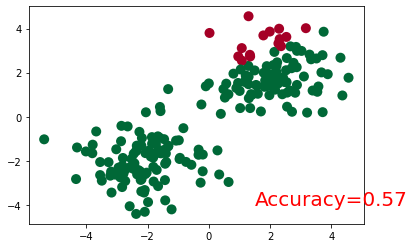

tensor([[ 0.6701,  0.6983],
        [ 0.6741,  0.7726],
        [ 0.8991,  0.9250],
        [ 0.6275,  0.7154],
        [ 0.8430,  0.7572],
        [ 0.8442,  0.8358],
        [ 0.8894,  0.6165],
        [ 1.0784,  1.0143],
        [ 0.7493,  0.8208],
        [ 1.1105,  1.0704],
        [ 1.1355,  1.0905],
        [ 0.8214,  0.6596],
        [ 1.0962,  1.0790],
        [ 0.4448,  0.5165],
        [ 0.9152,  0.9402],
        [ 0.8401,  0.8147],
        [ 1.1964,  1.1641],
        [ 0.9017,  0.9369],
        [ 1.0326,  1.0085],
        [ 0.9471,  0.9609],
        [ 0.9997,  0.9453],
        [ 0.9824,  0.9672],
        [ 1.1365,  1.2554],
        [ 1.0787,  1.0926],
        [ 0.7614,  0.6247],
        [ 0.9437,  0.9556],
        [ 1.1548,  1.0966],
        [ 1.2794,  1.0391],
        [ 1.0505,  0.9167],
        [ 0.8843,  0.9137],
        [ 1.0487,  1.1056],
        [ 0.0214,  0.0739],
        [ 0.8432,  0.8982],
        [ 0.7842,  0.8435],
        [ 0.9753,  0.9572],
        [ 1.1869,  1

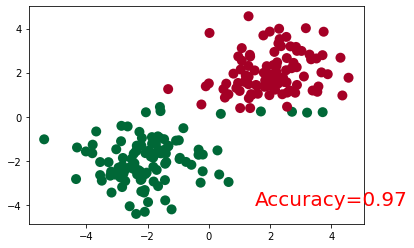

tensor([[ 7.6075e-01,  6.0545e-01],
        [ 7.6349e-01,  6.8250e-01],
        [ 1.0303e+00,  7.9248e-01],
        [ 7.0977e-01,  6.3409e-01],
        [ 9.8445e-01,  6.1062e-01],
        [ 9.6781e-01,  7.0857e-01],
        [ 1.0839e+00,  4.1429e-01],
        [ 1.2478e+00,  8.3936e-01],
        [ 8.4939e-01,  7.1986e-01],
        [ 1.2855e+00,  8.9349e-01],
        [ 1.3160e+00,  9.0794e-01],
        [ 9.7908e-01,  4.9609e-01],
        [ 1.2706e+00,  9.0268e-01],
        [ 5.0004e-01,  4.6125e-01],
        [ 1.0504e+00,  8.0372e-01],
        [ 9.6675e-01,  6.8431e-01],
        [ 1.3937e+00,  9.6458e-01],
        [ 1.0348e+00,  8.0244e-01],
        [ 1.1904e+00,  8.4904e-01],
        [ 1.0887e+00,  8.1794e-01],
        [ 1.1557e+00,  7.8437e-01],
        [ 1.1290e+00,  8.1920e-01],
        [ 1.3148e+00,  1.0687e+00],
        [ 1.2508e+00,  9.1281e-01],
        [ 9.0493e-01,  4.7604e-01],
        [ 1.0842e+00,  8.1371e-01],
        [ 1.3383e+00,  9.1096e-01],
        [ 1.5170e+00,  7.917

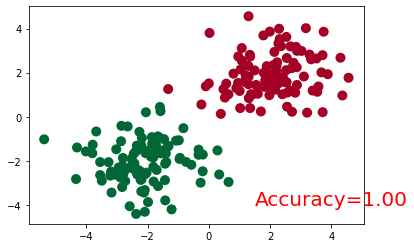

tensor([[ 0.8375,  0.5293],
        [ 0.8393,  0.6088],
        [ 1.1424,  0.6837],
        [ 0.7793,  0.5677],
        [ 1.1052,  0.4902],
        [ 1.0732,  0.6040],
        [ 1.2506,  0.2480],
        [ 1.3930,  0.6955],
        [ 0.9345,  0.6371],
        [ 1.4355,  0.7482],
        [ 1.4709,  0.7580],
        [ 1.1138,  0.3616],
        [ 1.4202,  0.7579],
        [ 0.5457,  0.4164],
        [ 1.1658,  0.6917],
        [ 1.0748,  0.5772],
        [ 1.5632,  0.8007],
        [ 1.1485,  0.6921],
        [ 1.3255,  0.7181],
        [ 1.2097,  0.7005],
        [ 1.2892,  0.6521],
        [ 1.2543,  0.6976],
        [ 1.4678,  0.9151],
        [ 1.3996,  0.7689],
        [ 1.0274,  0.3538],
        [ 1.2043,  0.6972],
        [ 1.4959,  0.7584],
        [ 1.7213,  0.5881],
        [ 1.3863,  0.5744],
        [ 1.1217,  0.6783],
        [ 1.3529,  0.7937],
        [ 0.1079, -0.0122],
        [ 1.0679,  0.6755],
        [ 0.9825,  0.6468],
        [ 1.2436,  0.6855],
        [ 1.5482,  0

In [14]:
for t in range(15):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted
    print(out)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    # if t % 10 == 0 or t in [3, 6]:
    if t % 3 == 0:
        # plot and show learning process
        plt.cla()
        _, prediction = torch.max(F.softmax(out), 1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)
        

plt.ioff()

In [15]:
y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])